In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences



In [ ]:
# Load the dataset
data = pd.read_csv("queen.csv")


In [ ]:
data

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1568167503947235331,1568167503947235331,2022-09-09 14:50:42 India Standard Time,2022-09-09,14:50:42,530,963099618547589121,inpd_,In Professional Development,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1568167501334253568,1568167501334253568,2022-09-09 14:50:42 India Standard Time,2022-09-09,14:50:42,530,26475981,ukpostbox,UK Postbox,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1568167500134731776,1568167500134731776,2022-09-09 14:50:41 India Standard Time,2022-09-09,14:50:41,530,868028006610153472,brandminds,BRAND MINDS,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1568167499320987648,1568167499320987648,2022-09-09 14:50:41 India Standard Time,2022-09-09,14:50:41,530,340163485,nxcoventry,NX Coventry,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1568167498410778631,1568167498410778631,2022-09-09 14:50:41 India Standard Time,2022-09-09,14:50:41,530,19282280,metoffice,Met Office,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5592,1568159392683667457,1568159392683667457,2022-09-09 14:18:28 India Standard Time,2022-09-09,14:18:28,530,2207446291,zeeodisha,ZEE Odisha News,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
5593,1568159392280838144,1568159392280838144,2022-09-09 14:18:28 India Standard Time,2022-09-09,14:18:28,530,1545059583470624768,stmarysandbach,St Mary’s Sandbach,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
5594,1568159390120681472,1568159390120681472,2022-09-09 14:18:28 India Standard Time,2022-09-09,14:18:28,530,235098072,forcialondon,Forcia Limited,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
5595,1568159388157857792,1568159388157857792,2022-09-09 14:18:27 India Standard Time,2022-09-09,14:18:27,530,21475394,crusadersfc,Crusaders FC,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [ ]:
data.head(10000)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1568167503947235331,1568167503947235331,2022-09-09 14:50:42 India Standard Time,2022-09-09,14:50:42,530,963099618547589121,inpd_,In Professional Development,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1568167501334253568,1568167501334253568,2022-09-09 14:50:42 India Standard Time,2022-09-09,14:50:42,530,26475981,ukpostbox,UK Postbox,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1568167500134731776,1568167500134731776,2022-09-09 14:50:41 India Standard Time,2022-09-09,14:50:41,530,868028006610153472,brandminds,BRAND MINDS,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1568167499320987648,1568167499320987648,2022-09-09 14:50:41 India Standard Time,2022-09-09,14:50:41,530,340163485,nxcoventry,NX Coventry,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1568167498410778631,1568167498410778631,2022-09-09 14:50:41 India Standard Time,2022-09-09,14:50:41,530,19282280,metoffice,Met Office,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5592,1568159392683667457,1568159392683667457,2022-09-09 14:18:28 India Standard Time,2022-09-09,14:18:28,530,2207446291,zeeodisha,ZEE Odisha News,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
5593,1568159392280838144,1568159392280838144,2022-09-09 14:18:28 India Standard Time,2022-09-09,14:18:28,530,1545059583470624768,stmarysandbach,St Mary’s Sandbach,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
5594,1568159390120681472,1568159390120681472,2022-09-09 14:18:28 India Standard Time,2022-09-09,14:18:28,530,235098072,forcialondon,Forcia Limited,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
5595,1568159388157857792,1568159388157857792,2022-09-09 14:18:27 India Standard Time,2022-09-09,14:18:27,530,21475394,crusadersfc,Crusaders FC,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [ ]:
columns_with_nan = data.columns[data.isna().any()].tolist()

In [ ]:
columns_with_nan = data.columns[data.isna().any()].tolist()

In [ ]:
data.to_csv("queen_no_nan.csv", index=False)

In [ ]:
data

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1568167503947235331,1568167503947235331,2022-09-09 14:50:42 India Standard Time,2022-09-09,14:50:42,530,963099618547589121,inpd_,In Professional Development,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1568167501334253568,1568167501334253568,2022-09-09 14:50:42 India Standard Time,2022-09-09,14:50:42,530,26475981,ukpostbox,UK Postbox,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1568167500134731776,1568167500134731776,2022-09-09 14:50:41 India Standard Time,2022-09-09,14:50:41,530,868028006610153472,brandminds,BRAND MINDS,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1568167499320987648,1568167499320987648,2022-09-09 14:50:41 India Standard Time,2022-09-09,14:50:41,530,340163485,nxcoventry,NX Coventry,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1568167498410778631,1568167498410778631,2022-09-09 14:50:41 India Standard Time,2022-09-09,14:50:41,530,19282280,metoffice,Met Office,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5592,1568159392683667457,1568159392683667457,2022-09-09 14:18:28 India Standard Time,2022-09-09,14:18:28,530,2207446291,zeeodisha,ZEE Odisha News,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
5593,1568159392280838144,1568159392280838144,2022-09-09 14:18:28 India Standard Time,2022-09-09,14:18:28,530,1545059583470624768,stmarysandbach,St Mary’s Sandbach,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
5594,1568159390120681472,1568159390120681472,2022-09-09 14:18:28 India Standard Time,2022-09-09,14:18:28,530,235098072,forcialondon,Forcia Limited,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
5595,1568159388157857792,1568159388157857792,2022-09-09 14:18:27 India Standard Time,2022-09-09,14:18:27,530,21475394,crusadersfc,Crusaders FC,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [ ]:
X = data['tweet']
y = data['id']

In [ ]:
# Tokenize the text data
max_words = 10000  # Adjust based on your dataset size
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)

In [ ]:
# Pad sequences to ensure they have the same length
max_sequence_length = 200  # Adjust based on your dataset
X = pad_sequences(X, maxlen=max_sequence_length)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define and train the models
models = []

In [ ]:
# Example 1: Convolutional Neural Network (CNN)
model_cnn = keras.Sequential([
    keras.layers.Embedding(max_words, 128, input_length=max_sequence_length),
    keras.layers.Conv1D(128, 5, activation='relu'),
    keras.layers.GlobalMaxPooling1D(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_cnn.fit(X_train, y_train, epochs=5, batch_size=64)
models.append(("CNN", model_cnn))

Epoch 1/5
70/70 [==============================] - 21s 267ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 2/5
70/70 [==============================] - 24s 340ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 3/5
70/70 [==============================] - 23s 328ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 4/5
70/70 [==============================] - 19s 273ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 5/5
70/70 [==============================] - 12s 166ms/step - loss: nan - accuracy: 0.0000e+00


In [ ]:
# Example 2: Recurrent Neural Network (RNN)
model_rnn = keras.Sequential([
    keras.layers.Embedding(max_words, 128, input_length=max_sequence_length),
    keras.layers.LSTM(64),
    keras.layers.Dense(1, activation='sigmoid')
])
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_rnn.fit(X_train, y_train, epochs=5, batch_size=64)
models.append(("RNN", model_rnn))

Epoch 1/5
70/70 [==============================] - 23s 290ms/step - loss: -11394363243456626688.0000 - accuracy: 0.0000e+00
Epoch 2/5
70/70 [==============================] - 19s 268ms/step - loss: -25080442970733281280.0000 - accuracy: 0.0000e+00
Epoch 3/5
70/70 [==============================] - 20s 284ms/step - loss: -33387596366208827392.0000 - accuracy: 0.0000e+00
Epoch 4/5
70/70 [==============================] - 19s 265ms/step - loss: -41144437594912718848.0000 - accuracy: 0.0000e+00
Epoch 5/5
70/70 [==============================] - 21s 296ms/step - loss: -48661666652621897728.0000 - accuracy: 0.0000e+00


In [ ]:
# Example 3: Bidirectional LSTM
model_bidirectional = keras.Sequential([
    keras.layers.Embedding(max_words, 128, input_length=max_sequence_length),
    keras.layers.Bidirectional(keras.layers.LSTM(64)),
    keras.layers.Dense(1, activation='sigmoid')
])
model_bidirectional.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_bidirectional.fit(X_train, y_train, epochs=5, batch_size=64)
models.append(("Bidirectional LSTM", model_bidirectional))

Epoch 1/5
70/70 [==============================] - 40s 500ms/step - loss: -17798456624810033152.0000 - accuracy: 0.0000e+00
Epoch 2/5
70/70 [==============================] - 35s 489ms/step - loss: -41284713288384380928.0000 - accuracy: 0.0000e+00
Epoch 3/5
70/70 [==============================] - 35s 508ms/step - loss: -57709349925497602048.0000 - accuracy: 0.0000e+00
Epoch 4/5
70/70 [==============================] - 35s 508ms/step - loss: -73023418245905907712.0000 - accuracy: 0.0000e+00
Epoch 5/5
70/70 [==============================] - 36s 512ms/step - loss: -88056411811836067840.0000 - accuracy: 0.0000e+00


In [ ]:
# Evaluate and plot the accuracy of each model
import matplotlib.pyplot as plt

accuracies = []
for model_name, model in models:
    y_pred = model.predict(X_test)
    y_pred = (y_pred > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append((model_name, accuracy))

accuracies = sorted(accuracies, key=lambda x: x[1], reverse=True)
model_names, accuracies = zip(*accuracies)


35/35 [==============================] - 4s 91ms/step


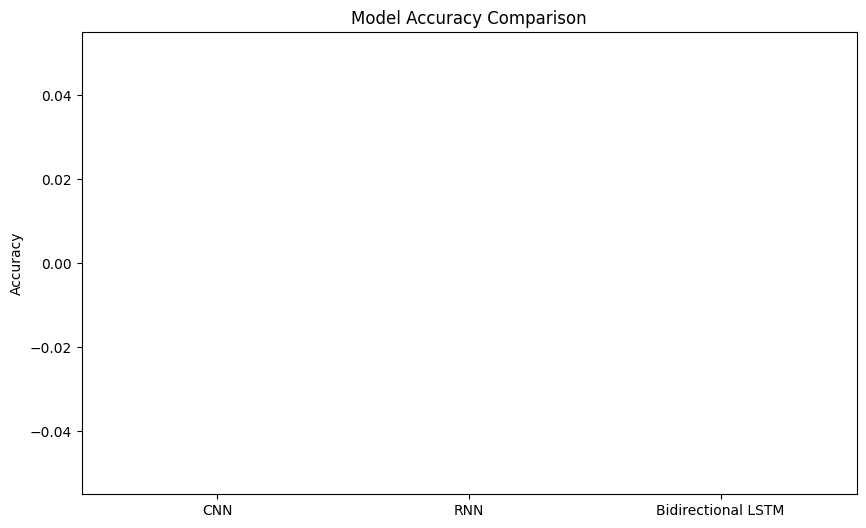

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

Epoch 1/5
70/70 [==============================] - 17s 246ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/5
70/70 [==============================] - 13s 189ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/5
70/70 [==============================] - 13s 187ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/5
70/70 [==============================] - 12s 178ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/5
70/70 [==============================] - 13s 187ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00


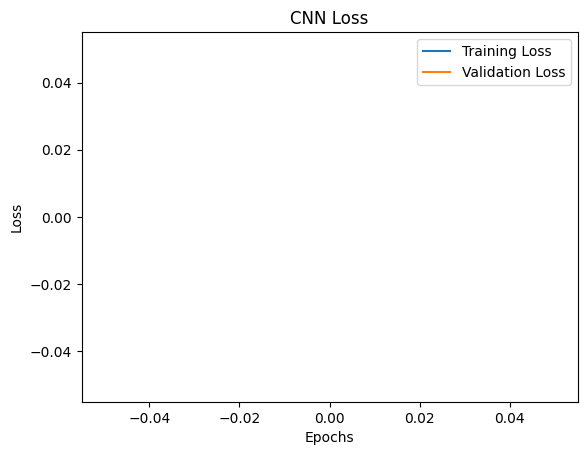

Epoch 1/5
70/70 [==============================] - 21s 305ms/step - loss: -56052944454346080256.0000 - accuracy: 0.0000e+00 - val_loss: -59762868210276237312.0000 - val_accuracy: 0.0000e+00
Epoch 2/5
70/70 [==============================] - 29s 414ms/step - loss: -63365831475056345088.0000 - accuracy: 0.0000e+00 - val_loss: -67045681388943572992.0000 - val_accuracy: 0.0000e+00
Epoch 3/5
70/70 [==============================] - 23s 327ms/step - loss: -70625141493168340992.0000 - accuracy: 0.0000e+00 - val_loss: -74283515745941848064.0000 - val_accuracy: 0.0000e+00
Epoch 4/5
70/70 [==============================] - 20s 283ms/step - loss: -77845572780122177536.0000 - accuracy: 0.0000e+00 - val_loss: -81487894163130155008.0000 - val_accuracy: 0.0000e+00
Epoch 5/5
70/70 [==============================] - 22s 322ms/step - loss: -85036528359358595072.0000 - accuracy: 0.0000e+00 - val_loss: -88666403270740148224.0000 - val_accuracy: 0.0000e+00


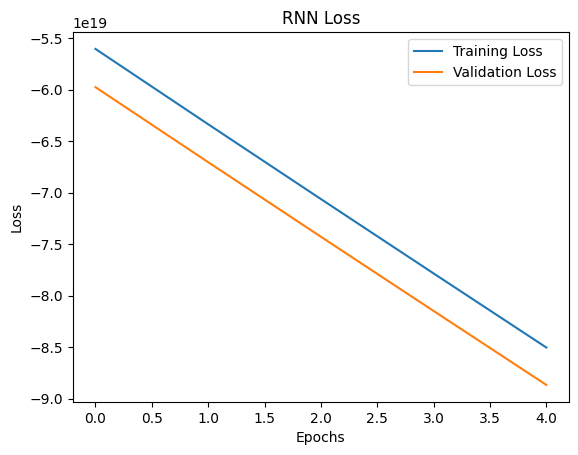

Epoch 1/5
70/70 [==============================] - 39s 555ms/step - loss: -102977945685035319296.0000 - accuracy: 0.0000e+00 - val_loss: -110444465266471469056.0000 - val_accuracy: 0.0000e+00
Epoch 2/5
70/70 [==============================] - 38s 539ms/step - loss: -117657903659472650240.0000 - accuracy: 0.0000e+00 - val_loss: -125048548142499233792.0000 - val_accuracy: 0.0000e+00
Epoch 3/5
70/70 [==============================] - 38s 548ms/step - loss: -132207318817367392256.0000 - accuracy: 0.0000e+00 - val_loss: -139548362131841744896.0000 - val_accuracy: 0.0000e+00
Epoch 4/5
70/70 [==============================] - 39s 566ms/step - loss: -146668588327086587904.0000 - accuracy: 0.0000e+00 - val_loss: -153973849135146598400.0000 - val_accuracy: 0.0000e+00
Epoch 5/5
70/70 [==============================] - 39s 557ms/step - loss: -161065171368720465920.0000 - accuracy: 0.0000e+00 - val_loss: -168343269841527898112.0000 - val_accuracy: 0.0000e+00


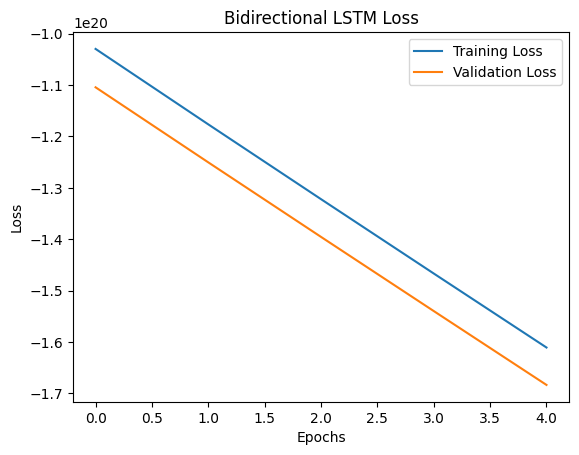

In [ ]:
import matplotlib.pyplot as plt

losses = []

for model_name, model in models:
    history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure()
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{model_name} Loss')
    plt.legend()
    plt.show()